---
title: "의사결정나무의 활용 | 다중공선성, 오버피팅, 이상치"
author: "강신성"
date: "2023-10-18"
categories: [python, Tree]
---




> 의사결정나무를 이용하여 주적들을 무찌르자!

## 1. 라이브러리 imports

In [2]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.linear_model
import sklearn.tree
import matplotlib.pyplot as plt
import seaborn as sns

## 2. 취업 자료 : 스코어(연속형 자료)의 예측 | 다중공선성

### **A. Data**
---




In [2]:
np.random.seed(43052)
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
df['employment_score'] = df.gpa * 1.0 + df.toeic* 1/100 + np.random.randn(500)
df

,employment_score,gpa,toeic,toeic0,toeic1,toeic2,toeic3,toeic4,toeic5,toeic6,...,toeic490,toeic491,toeic492,toeic493,toeic494,toeic495,toeic496,toeic497,toeic498,toeic499
0,1.784955,0.051535,135,129.566309,133.078481,121.678398,113.457366,133.564200,136.026566,141.793547,...,132.014696,140.013265,135.575816,143.863346,152.162740,132.850033,115.956496,131.842126,125.090801,143.568527
1,10.789671,0.355496,935,940.563187,935.723570,939.190519,938.995672,945.376482,927.469901,952.424087,...,942.251184,923.241548,939.924802,921.912261,953.250300,931.743615,940.205853,930.575825,941.530348,934.221055
2,8.221213,2.228435,485,493.671390,493.909118,475.500970,480.363752,478.868942,493.321602,490.059102,...,484.438233,488.101275,485.626742,475.330715,485.147363,468.553780,486.870976,481.640957,499.340808,488.197332
3,2.137594,1.179701,65,62.272565,55.957257,68.521468,76.866765,51.436321,57.166824,67.834920,...,67.653225,65.710588,64.146780,76.662194,66.837839,82.379018,69.174745,64.475993,52.647087,59.493275
4,8.650144,3.962356,445,449.280637,438.895582,433.598274,444.081141,437.005100,434.761142,443.135269,...,455.940348,435.952854,441.521145,443.038886,433.118847,466.103355,430.056944,423.632873,446.973484,442.793633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,9.057243,4.288465,280,276.680902,274.502675,277.868536,292.283300,277.476630,281.671647,296.307373,...,269.541846,278.220546,278.484758,284.901284,272.451612,265.784490,275.795948,280.465992,268.528889,283.638470
496,4.108020,2.601212,310,296.940263,301.545000,306.725610,314.811407,311.935810,309.695838,301.979914,...,304.680578,295.476836,316.582100,319.412132,312.984039,312.372112,312.106944,314.101927,309.409533,297.429968
497,2.430590,0.042323,225,206.793217,228.335345,222.115146,216.479498,227.469560,238.710310,233.797065,...,233.469238,235.160919,228.517306,228.349646,224.153606,230.860484,218.683195,232.949484,236.951938,227.997629
498,5.343171,1.041416,320,327.461442,323.019899,329.589337,313.312233,315.645050,324.448247,314.271045,...,326.297700,309.893822,312.873223,322.356584,319.332809,319.405283,324.021917,312.363694,318.493866,310.973930


* 무작위로 나누는 기능을 활용해 데이터셋을 나눠줌

In [3]:
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)

In [4]:
X,y = df_train.loc[:,'gpa':],df_train['employment_score']
XX,yy = df_test.loc[:,'gpa':],df_test['employment_score']

> 실제 kaggle에서는 yy를 모르는 상황임. (따라서 지금도 모른다고 생각해야)

### **B. 분석**
---




**분석 1 : tree**

In [5]:
## step1 -- pass 
## step2 
predictr = sklearn.tree.DecisionTreeRegressor(random_state=42)
## step3 
predictr.fit(X,y)
## step4
df_train['employment_score_hat'] = predictr.predict(X)
df_test['employment_score_hat'] = predictr.predict(XX)
#---#
print(f'train score: {predictr.score(X,y):.4f}')
print(f'test score: {predictr.score(XX,yy):.4f}')

train score: 1.0000
test score: 0.8300


* overfitting이 되긴 했는데, 나쁘진 않음...

**분석 2 : Lasso**

In [6]:
## step1 -- pass 
## step2 
predictr = sklearn.linear_model.LassoCV()  ## CV, 자동으로 적합한 alpha를 찾음
## step3 
predictr.fit(X,y)
## step4
df_train['employment_score_hat'] = predictr.predict(X)
df_test['employment_score_hat'] = predictr.predict(XX)
#---#
print(f'train score: {predictr.score(X,y):.4f}')
print(f'test score: {predictr.score(XX,yy):.4f}')

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.405e-01, tolerance: 2.707e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.201e+00, tolerance: 2.707e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

train score: 0.8994
test score: 0.8587


C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.379e+01, tolerance: 2.540e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.953e+01, tolerance: 2.540e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

In [7]:
print(f'train score: {predictr.score(X,y):.4f}')
print(f'test score: {predictr.score(XX,yy):.4f}')

train score: 0.8994
test score: 0.8587


### **C. 총평**
---



* Lasso가 좋긴한데, 의사결정나무도 공선성이 있는 상황에서 나쁘지 않음.
    * 참고로 Lasso는 엄청 발전된 모델
    * 의사결정나무는 아주 초기모델이라 개선의 여지가 있음

## 3. 취업 자료 2 : 범주형 자료의 예측 | 오버피팅

### **A. 사전작업**
---




* 종속변수와 관련이 없는 변수들을 생성하는 함수

In [38]:
def generating_df(n_balance):
    df = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment.csv')
    df_balance = pd.DataFrame((np.random.randn(500,n_balance)).reshape(500,n_balance)*1,columns = ['balance'+str(i) for i in range(n_balance)])
    return pd.concat([df,df_balance],axis=1)

In [40]:
df = generating_df(10)
df

,toeic,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
0,135,0.051535,0,-0.389093,2.098571,0.344139,-0.177362,-0.348537,0.389280,-0.912893,-0.483785,-0.057017,-1.470461
1,935,0.355496,0,0.429179,0.993111,-0.115885,1.171192,-0.297805,-0.128968,0.786999,1.330191,-2.002873,-0.942404
2,485,2.228435,0,0.157656,1.840530,0.723399,-0.167625,-1.351719,1.507525,0.092252,1.629317,0.248978,-0.094081
3,65,1.179701,0,-0.615452,0.817245,-0.696867,-2.007671,0.830670,-0.817632,0.819164,0.555076,1.079077,-0.709203
4,445,3.962356,1,1.382539,0.190304,-1.223522,-0.519966,-2.234701,-1.677971,-2.139017,-0.355884,-1.785976,-0.093330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,280,4.288465,1,-0.091515,-0.764912,0.014337,0.377415,0.624498,-1.729003,0.756378,1.603118,0.375107,2.018798
496,310,2.601212,1,-1.575953,1.239086,-0.788293,1.585463,-0.646203,-0.650222,0.281401,1.077615,0.811431,-0.956008
497,225,0.042323,0,1.205578,1.312460,-0.218066,-0.368847,0.003192,-0.348463,-0.391595,0.042380,-0.326235,-2.003287
498,320,1.041416,0,0.178910,-0.656850,-0.939821,0.520265,-0.648291,0.295857,-0.877743,-0.717515,-0.915672,-1.124188


* 위와 같이 자동으로 데이터셋을 스플릿

In [41]:
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.7, random_state=42)

In [42]:
X,y = df_train.drop(['employment'],axis=1), df_train['employment']
XX,yy = df_test.drop(['employment'],axis=1), df_test['employment']

### **B. 분석**
---




**분석 1 : 의사결정나무**

In [43]:
## step1 -- 위에서 함
## step2 
predictr = sklearn.tree.DecisionTreeClassifier(random_state=42)  ## 범주형의 경우 Classifier를 사용

## step3 
predictr.fit(X,y)

## step4
df_train['employment'] = predictr.predict(X)
df_test['employment'] = predictr.predict(XX)

#--#
print(f'train_score = {predictr.score(X,y):.4f}')
print(f'test_score = {predictr.score(XX,yy):.4f}')

train_score = 1.0000
test_score = 0.7571


> 오버피팅됨

In [48]:
## step1 -- pass
## step2 
predictr = sklearn.linear_model.LogisticRegressionCV(penalty='l1', solver='liblinear')
## step3 
predictr.fit(X,y)
## step4
df_train['employment'] = predictr.predict(X)
df_test['employment'] = predictr.predict(XX)
#--#
print(f'train_score = {predictr.score(X,y):.4f}')
print(f'test_score = {predictr.score(XX,yy):.4f}')

train_score = 0.8800
test_score = 0.8314


> Lasso - 역시 잘됨

In [46]:
## step1 -- pass
## step2 
predictr = sklearn.linear_model.LogisticRegressionCV(penalty='l2')
## step3 
predictr.fit(X,y)
## step4
df_train['employment'] = predictr.predict(X)
df_test['employment'] = predictr.predict(XX)
#--#
print(f'train_score = {predictr.score(X,y):.4f}')
print(f'test_score = {predictr.score(XX,yy):.4f}')

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

train_score = 0.8800
test_score = 0.8343


C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
print(f'train_score = {predictr.score(X,y):.4f}')
print(f'test_score = {predictr.score(XX,yy):.4f}')

train_score = 0.8800
test_score = 0.8343


> Ridge - 역시 또 잘됨(둘이 똑같은건 진짜 우연임)

### **C. 연구**
---




\- Balance 변수들의 수가 커짐에 따라서 각 방법들(의사결정나무, 로지스틱+Ridge, 로지스틱+Lasso)의 train/test score는 어떻게 변화할까?

아래와 같은 함수를 만들어보자.

In [50]:
def anal(df,predictr):
    df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.7, random_state=42)
    X,y = df_train.drop(['employment'],axis=1), df_train['employment']
    XX,yy = df_test.drop(['employment'],axis=1), df_test['employment']
    ## step1 -- 2~3 columns
    ## step2 -- input
    ## step3 
    predictr.fit(X,y)
    ## step4 -- retuen
    #--#
    return predictr.score(X,y),predictr.score(XX,yy)

\- 그럼 predictr의 리스트를 만들어 넣음으로써 실험해보자.

In [53]:
predictrs = [sklearn.tree.DecisionTreeClassifier(random_state=42),
             sklearn.linear_model.LogisticRegressionCV(penalty='l2'),
             sklearn.linear_model.LogisticRegressionCV(penalty='l1', solver='liblinear')]

In [56]:
n_balance_lst = range(0, 5000, 50) ## 0부터 5000까지 50간격으로

In [57]:
## 이중 컴프리헨션
lst = [[anal(generating_df(n_balaner), predictr) for predictr in predictrs] for n_balaner in n_balance_lst]

C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hollyriver\anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

> RidgeCV 때문에 좀 많이 오래걸림...

\- 실험결과 정리

In [62]:
arr = np.array(lst)  ## 보기 좋게 어레이로 정리
tr = arr[:,:,0]  ## n_balance, predictr, score -> train score
tst = arr[:,:,1]
arr.shape

(100, 3, 2)

In [67]:
tst

array([[0.75428571, 0.87714286, 0.86857143],
       [0.76      , 0.84285714, 0.82571429],
       [0.64285714, 0.80571429, 0.84857143],
       [0.72285714, 0.76285714, 0.79714286],
       [0.76571429, 0.69714286, 0.81142857],
       [0.68285714, 0.70571429, 0.76571429],
       [0.74285714, 0.71142857, 0.81714286],
       [0.67714286, 0.62571429, 0.78285714],
       [0.68857143, 0.68      , 0.76285714],
       [0.69142857, 0.68      , 0.78571429],
       [0.70857143, 0.65142857, 0.78857143],
       [0.72571429, 0.68      , 0.76571429],
       [0.69428571, 0.62571429, 0.75714286],
       [0.72857143, 0.67714286, 0.69714286],
       [0.73714286, 0.66      , 0.74285714],
       [0.67428571, 0.66857143, 0.69714286],
       [0.73142857, 0.69428571, 0.76      ],
       [0.71142857, 0.67142857, 0.72857143],
       [0.69714286, 0.63428571, 0.75142857],
       [0.68571429, 0.63428571, 0.70571429],
       [0.72      , 0.67142857, 0.71428571],
       [0.72      , 0.66571429, 0.72285714],
       [0.

> 전반적으로 관련없는 변수가 많아질수록 스코어가 떨어지나, 나중가니 tree가 덜 떨어져서 점수가 역전됐다.

\- 이를 시각화해보자

In [ ]:
pd.DataFrame(tr, columns = ['tree', 'ridge', 'lasso'])  ## tr이라는 array를 가져와서 columns을 따로 지정해준다.(어레이는 이름이 없으니까.)
_.assign(dataset = ['train' for i in range(100)])  ## 거기에 시각화를 위해 이게 어떤 데이터셋에서 따온 것인지 지정해줬다.(근데이럴거면 테스트 셋만 따오면 되는 거 아님?)
_

In [81]:
df1 = pd.DataFrame(tr, columns = ['tree', 'ridge', 'lasso']).assign(dataset = ['train' for i in range(100)]).assign(n_balance = list(range(0, 5000, 50)))
df2 = pd.DataFrame(tst, columns = ['tree', 'ridge', 'lasso']).assign(dataset = ['test' for i in range(100)]).assign(n_balance = list(range(0, 5000, 50)))
result_df = pd.concat([df1,df2], axis = 0).set_index(['dataset','n_balance']).stack().reset_index().set_axis(['dataset','n_balance','method','score'],axis=1)
result_df

,dataset,n_balance,method,score
0,train,0,tree,1.000000
1,train,0,ridge,0.866667
2,train,0,lasso,0.853333
3,train,50,tree,1.000000
4,train,50,ridge,0.926667
...,...,...,...,...
595,test,4900,ridge,0.620000
596,test,4900,lasso,0.600000
597,test,4950,tree,0.697143
598,test,4950,ridge,0.591429


<Axes: xlabel='n_balance', ylabel='score'>

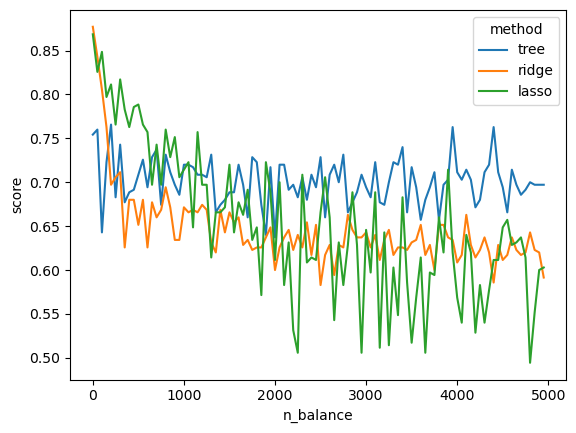

In [87]:
sns.lineplot(result_df.query('dataset=="test"'),x='n_balance',y='score',hue='method')

> test set에서 각 모델이 얼만큼의 성능을 보이는지 시각화했다. tree가 얼마나 강력한지 알 수 있는 부분이다.

\- 이래도 되는 거 아닌가?

In [97]:
df_ = pd.DataFrame(tst, columns = ['tree', 'ridge', 'lasso']).assign(n_balance = list(range(0,5000,50)))
df_ = df_.set_index(['n_balance']).stack().reset_index().set_axis(['n_balance', 'method', 'score'], axis = 1)

<Axes: xlabel='n_balance', ylabel='score'>

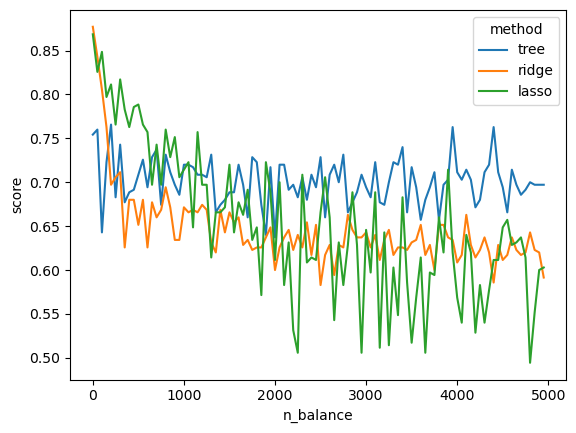

In [98]:
sns.lineplot(df_,x='n_balance',y='score',hue='method')

> 똑같음

## 4. 아이스크림 자료 | 이상치

### **A. Data**
---




In [3]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:100,3].to_numpy()
temp.sort()
ice_sales = 10 + temp * 0.5 + np.random.randn(100)
ice_sales[0] = 200
df_train = pd.DataFrame({'temp':temp,'ice_sales':ice_sales})
df_train

,temp,ice_sales
0,-4.1,200.000000
1,-3.7,9.234175
2,-3.0,9.642778
3,-1.3,9.657894
4,-0.5,9.987787
...,...,...
95,12.4,17.508688
96,13.4,17.105376
97,14.7,17.164930
98,15.0,18.555388


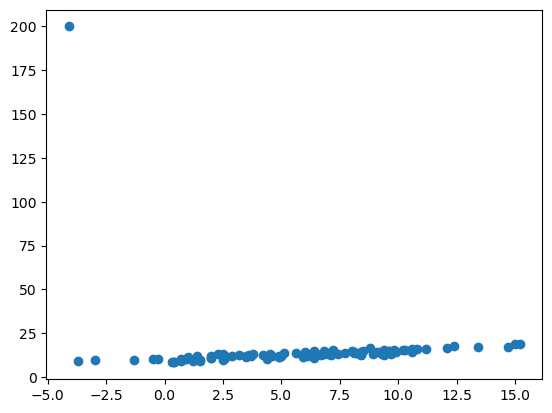

In [4]:
plt.plot(df_train.temp, df_train.ice_sales, 'o')

### **B. 분석**
---




\- 의사결정나무

In [5]:
# step 1
X = df_train[['temp']]
y = df_train['ice_sales']

# step 2
predictr = sklearn.tree.DecisionTreeRegressor()

# step 3
predictr.fit(X, y)

# step 4
df_train['ice_sales_hat'] = predictr.predict(X)

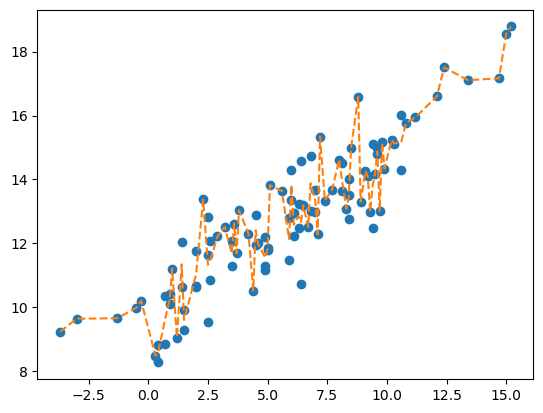

In [6]:
plt.plot(df_train.temp[1:],df_train.ice_sales[1:],'o')
plt.plot(df_train.temp[1:],df_train.ice_sales_hat[1:],'--')

\- 12.5~18구간 사이의 unseen data를 가상으로 만들고, 예측값을 살펴보면...

In [7]:
XX = df_test = pd.DataFrame({'temp':np.linspace(12.5,18,100)})

In [8]:
df_test['ice_sales_hat'] = predictr.predict(XX)

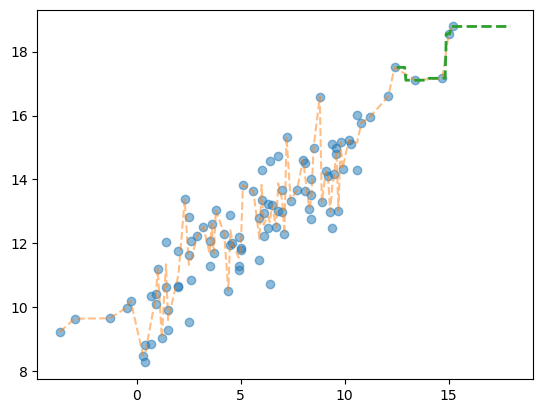

In [11]:
plt.plot(df_train.temp[1:], df_train.ice_sales[1:], 'o', alpha = 0.5)
plt.plot(df_train.temp[1:], df_train.ice_sales_hat[1:], '--', alpha = 0.5)
plt.plot(df_test.temp, df_test.ice_sales_hat, '--', linewidth = 2)

\- -15~0 구간(원 데이터의 outlier를 포함) 사이의 unseen data를 가상으로 만들고 예측값을 살펴보자.

In [12]:
XX = df_test = pd.DataFrame({'temp':np.linspace(-15,0,100)})

In [13]:
df_test['ice_sales_hat'] = predictr.predict(XX)

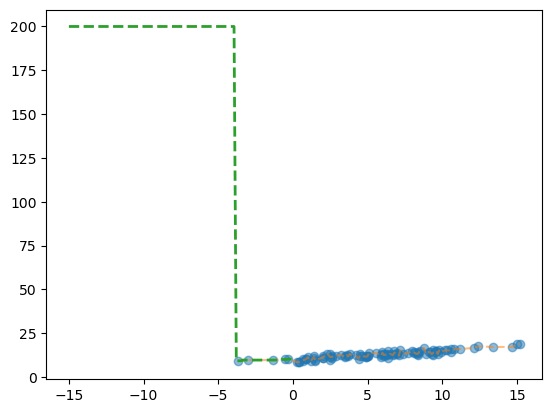

In [14]:
plt.plot(df_train.temp[1:],df_train.ice_sales[1:],'o',color='C0',alpha=0.5)
plt.plot(df_train.temp[1:],df_train.ice_sales_hat[1:],'--',color='C1',alpha=0.5)
plt.plot(df_test.temp,df_test.ice_sales_hat,'--',color='C2',linewidth=2)

> 근데 이 데이터에선 최선이지 않을까?